In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, ttest_ind, f_oneway, chi2_contingency
import scipy.stats as stats
from sklearn.preprocessing import Normalizer, LabelEncoder

In [282]:
df = pd.read_csv('./data/Student_performance_data.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [283]:
# Creación de dos variables para separar las variables númericas y las categóricas
variables_numericas = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA', 'GradeClass']
df_numericas = df[variables_numericas]

variables_categoricas = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
df_categoricas = df[variables_categoricas]

## **<u> Limpieza de valores missing </u>**

In [284]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [285]:
# Buscar valores nulos
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## **<u> Limpieza de valores outlier </u>**

Método IQR

El método IQR es una técnica que permite detectar valores atípicos en un conjunto de datos. El IQR se define como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) y se calcula con la fórmula:

$ IQR = Q3 - Q1 $

Este rango representa la dispersión de la mitad central de los datos. Los valores atípicos se consideran aquellos puntos que se encuentran fuera del rango definido por:

$ Q1 - 1.5 * IQR $

$ Q3 + 1.5 * IQR $

Estos valores extremos pueden distorsionar los resultados del análisis, por lo que es fundamental identificarlos y tratarlos adecuadamente.

In [286]:
# Identificar outliers en la variable 'Absences'

def identificar_outliers(df, col_categorica, col_cuantitativa):
  outliers = pd.DataFrame() 
  for categoria in df[col_categorica].unique(): 
    data_categoria = df[df[col_categorica] == categoria][col_cuantitativa] 
    Q1 = data_categoria.quantile(0.25) 
    Q3 = data_categoria.quantile(0.75) 
    IQR = Q3 - Q1 
    limite_inferior = Q1 - 1.5 * IQR 
    limite_superior = Q3 + 1.5 * IQR 
    outliers_categoria = data_categoria[(data_categoria < limite_inferior) | (data_categoria > limite_superior)] 
    outliers = pd.concat([outliers, outliers_categoria]) 
  return outliers 

outliers = identificar_outliers(df, 'GradeClass', 'Absences') 
print(f"Outliers identificados:\n{outliers}")

Outliers identificados:
      Absences
2182      25.0
2192      28.0
2225      23.0
2226      28.0
2247      25.0
...        ...
2294      28.0
2299      24.0
2309      21.0
2337      22.0
2375      24.0

[73 rows x 1 columns]


In [287]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [288]:
# Normalizar los datos
scaler = Normalizer()
df_limpio[variables_numericas] = scaler.fit_transform(df_limpio[variables_numericas])
df_limpio

,Age,StudyTimeWeekly,Absences,GPA,GradeClass,Gender,Ethnicity,ParentalEducation,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
0,0.623268,0.727161,0.256640,0.107393,0.073326,1,0,2,1,2,0,0,1,0
1,0.752822,0.644448,0.000000,0.127265,0.041823,0,0,1,0,1,0,0,0,0
2,0.490620,0.137719,0.850408,0.003683,0.130832,0,2,3,0,2,0,0,0,0
3,0.694719,0.409836,0.572121,0.083947,0.122597,1,0,3,0,3,1,0,0,0
4,0.684122,0.188033,0.684122,0.051835,0.160970,1,0,2,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,0.844768,0.501255,0.093863,0.162172,0.000000,1,0,3,0,4,1,0,0,0
2388,0.861649,0.384357,0.202741,0.166204,0.202741,0,0,1,1,4,0,1,0,0
2389,0.601478,0.255835,0.751848,0.042943,0.075185,1,0,2,0,2,0,0,0,1
2390,0.603269,0.468161,0.640973,0.067992,0.037704,1,1,0,0,2,0,1,1,0


<Axes: xlabel='GPA', ylabel='Absences'>

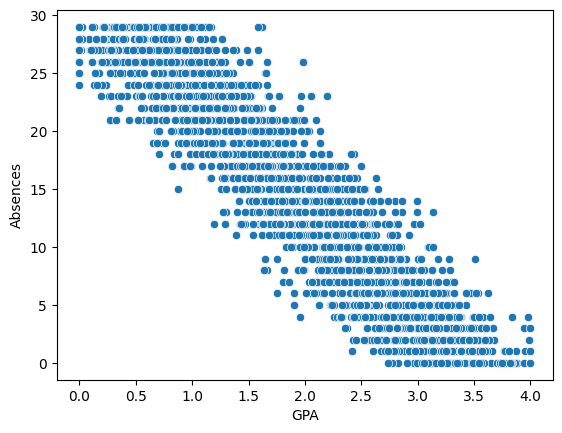

In [289]:
sns.scatterplot(data=df, x='GPA', y='Absences')

<Axes: xlabel='GPA', ylabel='StudyTimeWeekly'>

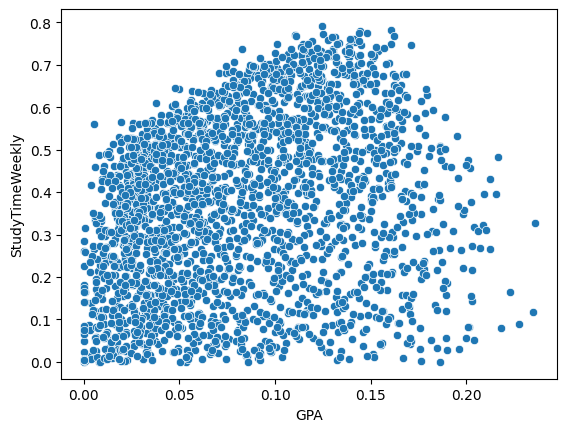

In [290]:
sns.scatterplot(data=df_limpio, x='GPA', y='StudyTimeWeekly')

### **<u> Correlación con GPA </u>**

In [291]:
# Calcular correlaciones de Spearman para comparar GPA con numericas
correlation_spearman = df_numericas_limpio.corr(method='spearman')

# Ordenar las correlaciones de Spearman respecto a 'GPA'
correlation_spearman_gpa = correlation_spearman['GPA'].sort_values(ascending=False)

print("Correlación de Spearman ordenada con respecto a 'GPA':\n", correlation_spearman_gpa)

Correlación de Spearman ordenada con respecto a 'GPA':
 GPA                1.000000
StudyTimeWeekly    0.169082
Age               -0.002075
GradeClass        -0.822601
Absences          -0.925467
Name: GPA, dtype: float64


In [292]:
# t de Student para GPA con variables categoricas dicotómicas

# Variables dicotómicas
dicotomicas = ['Gender', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

# Resultados de la prueba t
t_test_results = {}
for var in dicotomicas:
    # Dividir los datos en dos grupos según la variable categórica
    group1 = df[df[var] == 0]['GPA']
    group2 = df[df[var] == 1]['GPA']
    
    # Realizar la prueba t de Student
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # equal_var=False para usar la corrección de Welch
    t_test_results[var] = (t_stat, p_value)

print("Resultados de t de Student para 'GPA':\n")
for var, (t_stat, p_value) in t_test_results.items():
    print(f"Variable: {var}")
    print(f"T-statistic: {t_stat}")
    print(f"p-value: {p_value}\n")

Resultados de t de Student para 'GPA':

Variable: Gender
T-statistic: 0.6532351689605722
p-value: 0.5136676190960221

Variable: Tutoring
T-statistic: -7.172473757652107
p-value: 1.203032679774745e-12

Variable: Extracurricular
T-statistic: -4.6085862302131995
p-value: 4.319861266600564e-06

Variable: Sports
T-statistic: -2.8514100914591363
p-value: 0.0044164135820948395

Variable: Music
T-statistic: -3.5971064862299835
p-value: 0.00034381317186417095

Variable: Volunteering
T-statistic: -0.16111083350149413
p-value: 0.872067509765135



In [293]:
# ANOVA para GPA con variables categoricas politómicas

# Variables politómicas
politomicas = ['Ethnicity', 'ParentalEducation', 'ParentalSupport']

# Resultados de ANOVA
anova_results = {}
for var in politomicas:
    # Agrupar los datos por la variable categórica y obtener listas de GPA para cada grupo
    grouped = [group['GPA'].values for name, group in df.groupby(var)]
    
    # Realizar la prueba ANOVA
    f_stat, p_value = f_oneway(*grouped)
    anova_results[var] = (f_stat, p_value)

print("Resultados de ANOVA para 'GPA':\n")
for var, (f_stat, p_value) in anova_results.items():
    print(f"Variable: {var}")
    print(f"f_stat: {f_stat}")
    print(f"p_value: {p_value}\n")

Resultados de ANOVA para 'GPA':

Variable: Ethnicity
f_stat: 0.9581218945870755
p_value: 0.4115850271925584

Variable: ParentalEducation
f_stat: 1.8081303390687973
p_value: 0.12448408765780829

Variable: ParentalSupport
f_stat: 22.723458252496183
p_value: 1.906550653077039e-18



### **<u> Correlación con GradeClass </u>**

In [294]:
# ANOVA para cada variable numérica respecto a 'GradeClass'
anova_results = {}
for var in variables_numericas:
    if var != 'GradeClass':
        groups = [df_numericas_limpio[df_numericas_limpio['GradeClass'] == grade][var] for grade in df_numericas_limpio['GradeClass'].unique()]
        anova_results[var] = stats.f_oneway(*groups)

print("Resultados de ANOVA para 'GradeClass':\n")
for var, result in anova_results.items():
    print(f"Variable: {var}")
    print(f"f_stat: {result.statistic}")
    print(f"p_value: {result.pvalue}\n")

Resultados de ANOVA para 'GradeClass':

Variable: Age
f_stat: 0.16771783234757065
p_value: 0.9548495077916599

Variable: StudyTimeWeekly
f_stat: 11.269250054082054
p_value: 4.644425474306781e-09

Variable: Absences
f_stat: 903.1176108419997
p_value: 0.0

Variable: GPA
f_stat: 1174.8653935041525
p_value: 0.0



In [295]:
# La prueba de independencia Chi-cuadrado evalua si hay una asociacion significativa entre dos variables categoricas

# Codificar las variables categóricas
df_categoricas_encoded = df_categoricas.apply(LabelEncoder().fit_transform)

# Añadir 'GradeClass' a las variables categóricas codificadas
df_categoricas_encoded['GradeClass'] = df['GradeClass']

# Chi-cuadrado para cada variable categórica respecto a 'GradeClass'
chi2_results = {}
for var in variables_categoricas:
    contingency_table = pd.crosstab(df_categoricas_encoded[var], df_categoricas_encoded['GradeClass'])
    chi2_results[var] = chi2_contingency(contingency_table)

# Mostrar resultados de Chi-cuadrado
print("Resultados de Chi-cuadrado para 'GradeClass':\n")
for var, result in chi2_results.items():
    chi2, p, dof, ex = result
    print(f"Variable: {var}")
    print(f"Chi2: {chi2}")
    print(f"p_value: {p}\n")

Resultados de Chi-cuadrado para 'GradeClass':

Variable: Gender
Chi2: 1.9153728454653411
p_value: 0.7513204328843887

Variable: Ethnicity
Chi2: 7.918833433122388
p_value: 0.7914406773686918

Variable: ParentalEducation
Chi2: 14.881991324804849
p_value: 0.5332981013973794

Variable: Tutoring
Chi2: 37.75164234103285
p_value: 1.260840367380805e-07

Variable: ParentalSupport
Chi2: 73.78266419541622
p_value: 2.1506704168219007e-09

Variable: Extracurricular
Chi2: 14.217072478079006
p_value: 0.006633525439525449

Variable: Sports
Chi2: 4.369235709031912
p_value: 0.3583355089660035

Variable: Music
Chi2: 7.891467870855215
p_value: 0.09563575126138266

Variable: Volunteering
Chi2: 1.4828991605680653
p_value: 0.8296662879352824



#### **<u> Resultados para 'GPA' </u>**

**Resumen de la correlación de Spearman**
* Significativo (p < 0.05): Absences
* No significativo (p ≥ 0.05): StudyTimeWeekly, Age

**Resumen de la t de Student**
* Significativo (p < 0.05): Tutoring, Extracurricular, Sports, Music
* No significativo (p ≥ 0.05): Gender, Volunteering

**Resumen de la prueba ANOVA**
* Significativo (p < 0.05): ParentalSupport
* No significativo (p ≥ 0.05): Ethnicity, ParentalEducation

**Resultado**
* Número de variables independientes con relación significativa con 'GPA': 6

#### **<u> Resultados para 'GradeClass' </u>**

**Resumen de la prueba ANOVA**
* Significativo (p < 0.05): StudyTimeWeekly, Absences
* No significativo (p ≥ 0.05): Age

**Resumen de la prueba chi-cuadrado**
* Significativo (p < 0.05): Tutoring, ParentalSupport, Extracurricular
* No significativo (p ≥ 0.05): Gender, Ethnicity, ParentalEducation, Sports, Music, Volunteering

**Resultado**
* Número de variables independientes con relación significativa con 'GradeClass': 5

## **<u> Elección de la variable objetivo </u>**

Dado que hay más variables independientes con una relación significativa con la variable objetivo 'GPA' en comparación con 'GradeClass', se optará por usar 'GPA' para el análisis de datos y la construcción de modelos de Machine Learning. Esto de debe a que se espera que los modelos basados en 'GPA' proporcionen resultados más significativos y útiles.